In [19]:
import os
import pandas as pd
import numpy as np

from openpyxl import *
# https://openpyxl.readthedocs.io/en/stable/styles.html

import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
wb=load_workbook('countries.xlsx')
ws = wb['Sheet1']

# delete header row, start from 0, delete 1 - piece
ws.delete_rows(0,1)

a = 0
subregion = []
currregion = ''

for i in ws:
    a+=1
    if ws[a][0].font.b == True:
        subregion.append('Region Name')
        currregion = ws[a][0].value
    else:
        subregion.append(currregion)
subregion
# len(subregion)

['Region Name',
 'ASIA (EX. NEAR EAST)',
 'ASIA (EX. NEAR EAST)',
 'ASIA (EX. NEAR EAST)',
 'ASIA (EX. NEAR EAST)',
 'ASIA (EX. NEAR EAST)',
 'ASIA (EX. NEAR EAST)',
 'ASIA (EX. NEAR EAST)',
 'ASIA (EX. NEAR EAST)',
 'ASIA (EX. NEAR EAST)',
 'ASIA (EX. NEAR EAST)',
 'ASIA (EX. NEAR EAST)',
 'ASIA (EX. NEAR EAST)',
 'ASIA (EX. NEAR EAST)',
 'ASIA (EX. NEAR EAST)',
 'ASIA (EX. NEAR EAST)',
 'ASIA (EX. NEAR EAST)',
 'ASIA (EX. NEAR EAST)',
 'ASIA (EX. NEAR EAST)',
 'ASIA (EX. NEAR EAST)',
 'ASIA (EX. NEAR EAST)',
 'ASIA (EX. NEAR EAST)',
 'ASIA (EX. NEAR EAST)',
 'ASIA (EX. NEAR EAST)',
 'ASIA (EX. NEAR EAST)',
 'ASIA (EX. NEAR EAST)',
 'ASIA (EX. NEAR EAST)',
 'ASIA (EX. NEAR EAST)',
 'ASIA (EX. NEAR EAST)',
 'Region Name',
 'BALTICS',
 'BALTICS',
 'BALTICS',
 'Region Name',
 'C.W. OF IND. STATES',
 'C.W. OF IND. STATES',
 'C.W. OF IND. STATES',
 'C.W. OF IND. STATES',
 'C.W. OF IND. STATES',
 'C.W. OF IND. STATES',
 'C.W. OF IND. STATES',
 'C.W. OF IND. STATES',
 'C.W. OF IND. STATES',


In [7]:
data = pd.read_excel(r'countries.xlsx', header=[0], sheet_name='Sheet1', index_col=None)
data

,Region/Country,Population
0,ASIA (EX. NEAR EAST),3687982236
1,Afghanistan,31056997
2,Bangladesh,147365352
3,Bhutan,2279723
4,Brunei,379444
5,Burma,47382633
6,Cambodia,13881427
7,China,1313973713
8,East Timor,1062777
9,Hong Kong,6940432


In [8]:
if 'Subregion' in data.columns:
    del data['Subregion']

# insert column "Subregion" after position - 1
data.insert(1,'Subregion', subregion)
data

,Region/Country,Subregion,Population
0,ASIA (EX. NEAR EAST),Region Name,3687982236
1,Afghanistan,ASIA (EX. NEAR EAST),31056997
2,Bangladesh,ASIA (EX. NEAR EAST),147365352
3,Bhutan,ASIA (EX. NEAR EAST),2279723
4,Brunei,ASIA (EX. NEAR EAST),379444
5,Burma,ASIA (EX. NEAR EAST),47382633
6,Cambodia,ASIA (EX. NEAR EAST),13881427
7,China,ASIA (EX. NEAR EAST),1313973713
8,East Timor,ASIA (EX. NEAR EAST),1062777
9,Hong Kong,ASIA (EX. NEAR EAST),6940432


In [9]:
# rearrange columns in dataframe
data = data[['Subregion','Region/Country','Population']]
data

,Subregion,Region/Country,Population
0,Region Name,ASIA (EX. NEAR EAST),3687982236
1,ASIA (EX. NEAR EAST),Afghanistan,31056997
2,ASIA (EX. NEAR EAST),Bangladesh,147365352
3,ASIA (EX. NEAR EAST),Bhutan,2279723
4,ASIA (EX. NEAR EAST),Brunei,379444
5,ASIA (EX. NEAR EAST),Burma,47382633
6,ASIA (EX. NEAR EAST),Cambodia,13881427
7,ASIA (EX. NEAR EAST),China,1313973713
8,ASIA (EX. NEAR EAST),East Timor,1062777
9,ASIA (EX. NEAR EAST),Hong Kong,6940432


In [10]:
data[(data.Subregion != 'region')].groupby('Subregion').sum()

,Population
Subregion,
ASIA (EX. NEAR EAST),3687982236
BALTICS,7184974
C.W. OF IND. STATES,280081548
EASTERN EUROPE,119914717
LATIN AMER. & CARIB,561824599
NEAR EAST,195068377
NORTHERN AFRICA,161407133
NORTHERN AMERICA,331672307
OCEANIA,33131662


In [24]:
data[(data.Subregion == 'Region Name')]
regions = data[(data.Subregion == 'Region Name')]
regions

,Subregion,Region/Country,Population
0,Region Name,ASIA (EX. NEAR EAST),3687982236
29,Region Name,BALTICS,7184974
33,Region Name,C.W. OF IND. STATES,280081548
46,Region Name,EASTERN EUROPE,119914717
59,Region Name,LATIN AMER. & CARIB,561824599
105,Region Name,NEAR EAST,195068377
122,Region Name,NORTHERN AFRICA,161407133
129,Region Name,NORTHERN AMERICA,331672307
135,Region Name,OCEANIA,33131662
157,Region Name,SUB-SAHARAN AFRICA,749437000


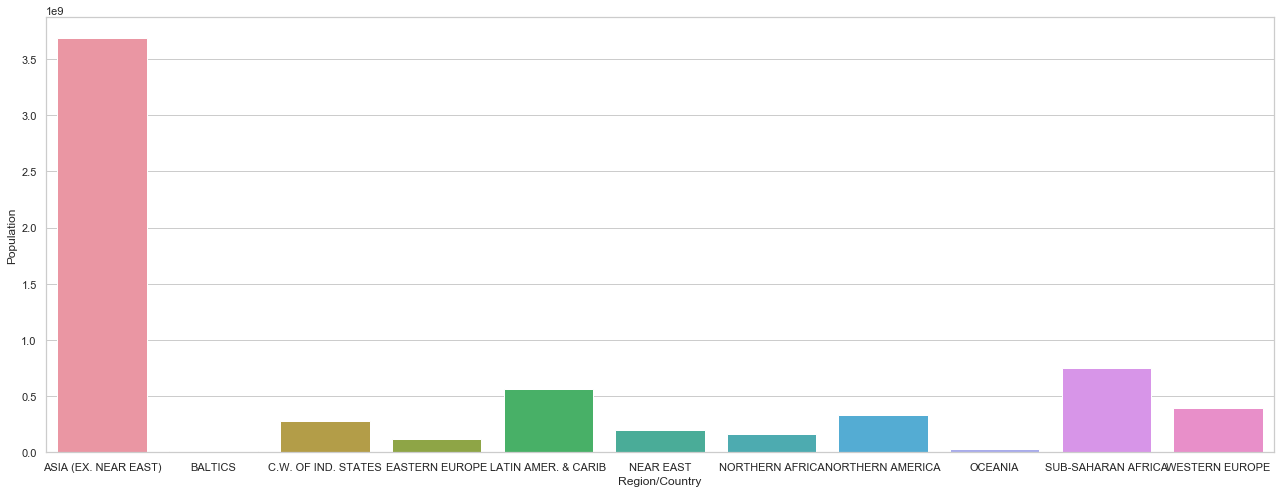

In [25]:
sns.set(style="whitegrid")
plt.figure(figsize=(22, 8))
ax = sns.barplot(x="Region/Country", y="Population", data=regions)

In [29]:
data.to_excel('new_countries.xlsx', index=0)